<a href="https://colab.research.google.com/github/jyun0618/TAVE_MLab/blob/main/Chapter05/jiyun_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CHAPTER 5 서포트 벡터 머신

### #1
> 서포트 벡터 머신의 기본 아이디어는 무엇인가요?

클래스 사이에 가능한 한 가장 넓은 '도로'를 내는 것. 즉, 두 클래스를 구분하는 결정 경계와 샘플 사이의 마진을 가장 크게 하는 것이 목적이다.

### #2
> 서포트 벡터가 무엇인가요?

SVM이 훈련된 후 경계를 포함해 도로에 놓인 어떤 샘플

결정 경계는 전적으로 서포트 벡터에 의해 결정되며, 서포트  벡터가 아닌(즉, 도로 밖에 있는) 어떤 샘플도 영향을 주지 못한다.

### #3
> SVM을 사용할 때 입력값의 스케일이 왜 중요한가요?

SVM은 스케일에 민감하여 훈련세트의 스케일이 맞지 않으면 크기가 작은 특성을 무시하는 경향이 있음

### #4
>SVM 분류기가 샘플을 분류할 때 신뢰도 점수와 확률을 출력할 수 있나요?

`decision_function` 메서드를 사용하여 신뢰도 점수를 얻을 수 있음. 이는 샘플과 결정 경계 사이의 거리를 나타냄

하지만 이를 클래스 확률의 추정치로 직접 변환할 수는 없음

SVC를 만들 때 `probability=True`로 지정 시 훈련이 끝날 때 5-폴드 교차검증을 사용해 훈련 샘플에 대한 표본 외(out-of-sample) 점수를 생성, 이 점수를 추정 확률에 매핑하기 위해 로지스틱 회귀 모델을 훈련함. 그런 뒤 `predict_proba()` 및 `predict_log_proba()` 메서드를 사용할 수 있음

### #5
> LinearSVC, SVC, SGDClassifier 중에서 어떤 것을 선택해야 하나요?

세 가지 모두 라지 마진의 선형 분류에 사용될 수 있음
* SVC: 커널 트릭 지원 → 비선형 작업도 처리 가능, 많은 개수의 특성으로 잘 확장 / 많은 샘플을 가진 데이터셋으로는 잘 확장 X
* LinearSVC: 선형 SVM에 최적화된 알고리즘 구현
* SGDClassifier: 확률적 경사 하강법 사용, 유연하고 점진적 학습 지원

### #6
> RBF 커널을 사용해 SVM을 훈련시켰더니 훈련 세트에 과소적합된 것 같습니다.
>
> ᵧ를 증가시켜야 할까요, 감소시켜야 할까요? C의 경우는 어떤가요?

과소적합은 규제가 너무 큰 것일 수 있음. 규제를 줄이려면 gamma나 C(또는 둘 다) 증가시켜야 함

### #7
>모델이 ϵ에 민감하다는 것은 무슨 의미인가요?

도로 폭은 입실론(ε, epsilon) 매개변수로 조절됨.
회귀 SVM 모델은 작은 마진 내에 최대한 많은 샘플을 예측하도록 훈련.

마진 내에 샘플을 추가하면 모델에 전혀 영향을 주지 않으며, 이를 ε에 민감하지 않다고 말함

### #8
>커널 트릭을 사용하는 이유는 무엇인가요?

커널 트릭은 비선형 SVM 모델을 훈련할 수 있게 해주는 수학적 기법

비선형 변환을 사용해 입력을 다른 공간에 매핑, 선형 SVM을 훈련하는 것과 동일.

### #9
> 선형적으로 분리되는  데이터셋에 LinearSVC를 훈련시켜보세요. 그런 다음 같은 데이터셋에 SVC와 SGDClassifier를 적용해보세요. 거의 비슷한 모델이 만들어지는지 확인해보세요.

In [5]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [6]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C = 5 # 정규화 강도 조절 파라미터. C가 클수록 규제(regularization)가 약해지고 모델은 더 복잡해짐.
alpha = 1 / (C * len(X)) # SGDClassifier는 alpha를 정규화 강도로 사용. C와의 관계를 고려하여 적절히 계산함.

lin_clf = LinearSVC(loss="hinge", C=C, random_state=42)
svm_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, tol=1e-3, alpha=alpha,
                        max_iter=100000, random_state=42)
# learning_rate="constant": 학습률이 고정
# tol = 수렴 조건 (조기 종료): 연속된 몇 번의 epoch 동안 손실의 감소량이 1e-3보다 작으면 학습을 멈춤.

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

print("LinearSVC:                   ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:                         ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

LinearSVC:                    [0.28475098] [[1.05364854 1.09903804]]
SVC:                          [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha=0.00200): [0.117] [[0.77714169 0.72981762]]


* 모델의 결정 경계

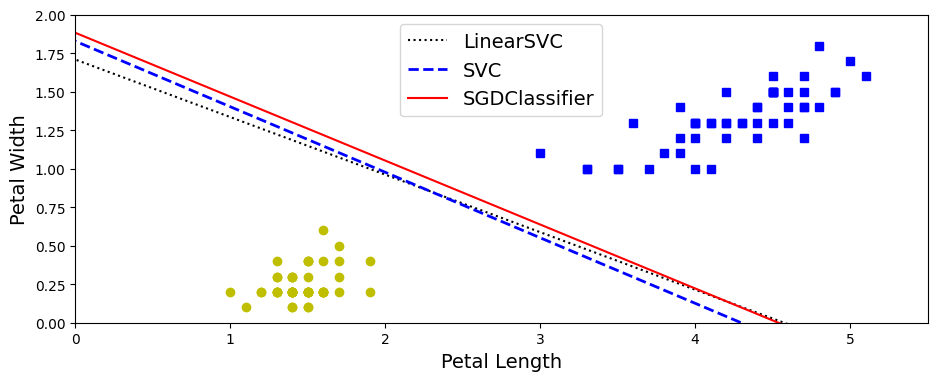

In [7]:
# 각 결정 경계의 기울기와 편향을 계산합니다
w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1] # 기울기
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1] # 절편
w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

# 결정 경계를 원본 스케일로 변환합니다
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]]) # x 축에 -10부터 10까지의 범위를 설정하고 그에 맞는 y를 계산
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

# 세 개의 결정 경계를 모두 그립니다
import matplotlib.pyplot as plt

plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris-Versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris-Setosa"
plt.xlabel("Petal Length", fontsize=14)
plt.ylabel("Petal Width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

*아주 비슷하다!*

### #10
> MNIST 데이터셋에 SVM 분류기를 훈련시켜보세요. SVM 분류기는 이진 분류기라서 OvA 전략을 사용해 10개의 숫자를 분류해야 합니다. 처리 속도를 높이기 위해 작은 검증 세트로 하이퍼파라미터를 조정하는 것이 좋습니다. 어느 정도까지 정확도를 높일 수 있나요?

In [8]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X = mnist["data"]
y = mnist["target"]

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

In [9]:
import numpy as np
# 훈련 샘플 섞기
np.random.seed(42)
rnd_idx = np.random.permutation(60000)
X_train = X_train.iloc[rnd_idx]
y_train = y_train.iloc[rnd_idx]

* 선형 SVM 분류기

이 모델은 자동으로 OvA(또는 OvR) 전략을 사용

In [10]:
lin_clf = LinearSVC(max_iter=10000, random_state=42)
lin_clf.fit(X_train, y_train)

LinearSVC(max_iter=10000, random_state=42)

In [11]:
# 훈련 세트에 대한 예측을 만들어 정확도를 측정
from sklearn.metrics import accuracy_score

y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)

0.92745

* 스케일링

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [13]:
lin_clf = LinearSVC(max_iter=10000, random_state=42)
lin_clf.fit(X_train_scaled, y_train)

LinearSVC(max_iter=10000, random_state=42)

In [14]:
y_pred = lin_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9275666666666667

* 커널 함수

In [15]:
svm_clf = SVC(gamma='auto', decision_function_shape="ovr")
svm_clf.fit(X_train_scaled[:10000], y_train[:10000])

SVC(gamma='auto')

In [16]:
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9476

* 하이퍼파라미터 튜닝

In [17]:
# 교차 검증을 사용한 랜덤 서치
# 빠른 진행을 위해 작은 데이터셋으로 작업
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)} # reciprocal(0.001, 0.1)는 로그 스케일로 무작위 추출
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, cv=3, n_iter=10, verbose=2, n_jobs=-1)
# 10가지의 하이퍼파라미터 조합을 무작위로 선택해서 평가
# verbose=2: 콘솔에 학습 과정을 자세히 출력.
# n_jobs=-1: 가능한 모든 CPU 코어를 사용하여 병렬 처리.
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=SVC(gamma='auto'), n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x79a5cda2b550>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x79a5cda25650>},
                   verbose=2)

In [18]:
rnd_search_cv.best_estimator_

SVC(C=np.float64(8.852316058423087), gamma=np.float64(0.0017660746504810706))

`best_params_`
단순히 최적의 하이퍼파라미터 값만 딕셔너리 형태로 반환

`best_estimator_`
`best_params_`로 학습까지 완료된 모델 객체를 반환

In [19]:
rnd_search_cv.best_score_

np.float64(0.8630037222851593)

In [20]:
# 전체 데이터셋으로 최선의 모델을 재훈련
rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)

SVC(C=np.float64(8.852316058423087), gamma=np.float64(0.0017660746504810706))

In [21]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.99965

In [22]:
# 테스트 세트로 모델 테스트
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.971

*아주 나쁘지 않지만 확실히 모델이 다소 과대적합*

### #11
> 캘리포니아 주택 데이터셋에서 SVM 회귀 모델을 훈련하고 미세 튜닝하세요. 2장에서 수정한 버전이 아닌 sklearn.datasets.fetch_california_housing()으로 로드한 원본 데이터셋을 사용할 수 있습니다. 타깃값은 십만 달러 단위입니다. 샘플이 20,000개가 넘기 때문에 SVM이 느려질 수 있습니다. 따라서 하이퍼파라미터 튜닝을 할 때 훨씬 적은 샘플(예. 2000개)을 사용하여 더 많은 하이퍼파라미터 조합을 테스트해야 합니다. 가장 좋은 모델의 RMSE는 얼마인가요?

In [23]:
# 데이터 로드
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # 데이터의 통계 정보 (예: 평균, 표준편차) 를 계산하고, 그 정보를 이용해서 데이터를 변환
X_test_scaled = scaler.transform(X_test) # 이미 fit()으로 계산한 통계 정보를 그대로 사용해서 데이터 변환만

In [26]:
from sklearn.svm import LinearSVR

lin_svr = LinearSVR(random_state=42)
lin_svr.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR(random_state=42)

In [27]:
# 훈련세트 성능 측정
from sklearn.metrics import mean_squared_error

y_pred = lin_svr.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)

In [28]:
# RMSE
np.sqrt(mse)

np.float64(0.9819256687727764)

훈련 세트에서 타깃은 만달러 단위

RMSE는 기대할 수 있는 에러의 정도를 대략 가늠하게 도와줌(에러가 클수록 큰 폭으로 증가).

이 모델의 에러가 대략 $10,000 정도로 예상 → 썩 좋지 않음

* 교차검증(CV)를 사용한 랜덤 서치
* RBF 커널이 더 나을지 확인

In [29]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(SVR(), param_distributions, cv=3, n_iter=10, verbose=2, random_state=42, n_jobs=-1)
rnd_search_cv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x79a5cda20290>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x79a5cda46550>},
                   random_state=42, verbose=2)

In [30]:
rnd_search_cv.best_estimator_

SVR(C=np.float64(4.745401188473625), gamma=np.float64(0.07969454818643935))

In [32]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
np.sqrt(mse)

y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
np.sqrt(mse)

np.float64(0.5727456438057161)

*선형 모델보다 훨씬 나아졌다!*

In [34]:
# 테스트 세트에서 평가
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

np.float64(0.5929120979852832)